In [104]:
#Spam Detection

In [1]:
#pip install tensorflow

In [110]:
#pandas
import pandas as pd 

#tensorflow
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns 

#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#regular expression
import re

In [114]:
df = pd.read_csv('data\\spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [116]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [118]:
#Rename dataset columns

In [122]:
df.rename({'v1':'label','v2':'text'},inplace=True,axis=1)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [126]:
df.shape

(5572, 2)

In [128]:
#Independent and Dependent features

In [130]:
X = df.drop('label',axis=1)
y = df.label

In [132]:
X.shape,y.shape

((5572, 1), (5572,))

In [134]:
#Encode target variable

In [136]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [138]:
#Data preprocessing¶

In [140]:
# Vocabulary size
voc_size = 3000

In [142]:
messages = X.copy()

In [144]:
messages.reset_index(inplace=True)
messages.head()

,index,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,U dun say so early hor... U c already then say...
4,4,"Nah I don't think he goes to usf, he lives aro..."


In [146]:
ps = PorterStemmer()

corpus = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
#commenting because of long lines
#corpus

In [150]:
#OneHot representation

In [152]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]

In [154]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [156]:
onehot_repr[0]

[72,
 1301,
 2051,
 914,
 2170,
 53,
 477,
 117,
 1518,
 1056,
 556,
 1214,
 310,
 884,
 1023,
 641]

In [158]:
#Word Embedding

In [160]:
#The original senteces have different length. Padding techinque is used to make all sentences with equal length by adding 0's from 
#start(pre-padding) or end(post-padding)

In [162]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  884 1023  641]
 [   0    0    0 ...  980  706  752]
 [1035  488  242 ...  204 2016 2065]
 ...
 [   0    0    0 ...  659 1475 1775]
 [   0    0    0 ... 2986   42 2874]
 [   0    0    0 ...  875  367  703]]


In [164]:
embedded_docs[0]

array([   0,    0,    0,    0,   72, 1301, 2051,  914, 2170,   53,  477,
        117, 1518, 1056,  556, 1214,  310,  884, 1023,  641])

In [168]:
#Model creation

In [170]:
embedding_vector_feature = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [172]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [174]:
#Split data

In [176]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [178]:
X_final.shape,y_final.shape

((5572, 20), (5572,))

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [182]:
#Model Training

In [184]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8360 - loss: 0.4177 - val_accuracy: 0.9570 - val_loss: 0.1885
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9708 - loss: 0.1306 - val_accuracy: 0.9799 - val_loss: 0.0808
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9838 - loss: 0.0536 - val_accuracy: 0.9831 - val_loss: 0.0606
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9946 - loss: 0.0219 - val_accuracy: 0.9831 - val_loss: 0.0587
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9953 - loss: 0.0150 - val_accuracy: 0.9859 - val_loss: 0.0626
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9974 - loss: 0.0096 - val_accuracy: 0.9864 - val_loss: 0.0634
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9994 - loss: 0.0062 - val_accuracy: 0.9880 - val_loss: 0.0588
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9853 - val_

In [186]:
#Model Evaluation

In [188]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


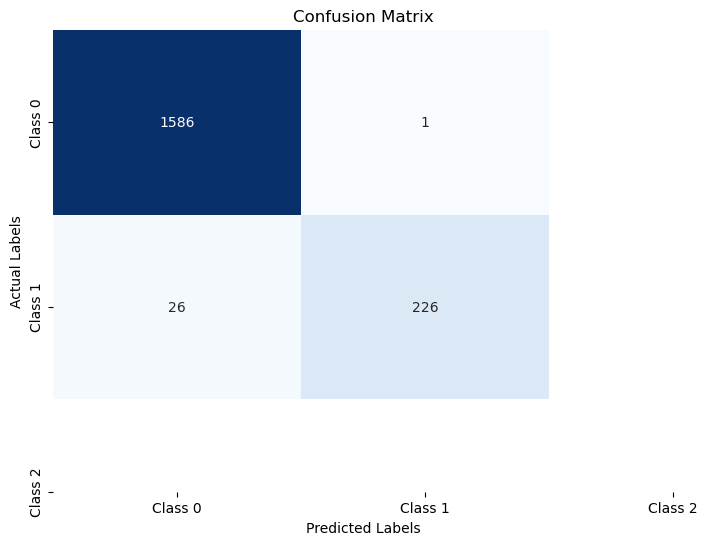

In [190]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.90      0.94       252

    accuracy                           0.99      1839
   macro avg       0.99      0.95      0.97      1839
weighted avg       0.99      0.99      0.98      1839

